`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


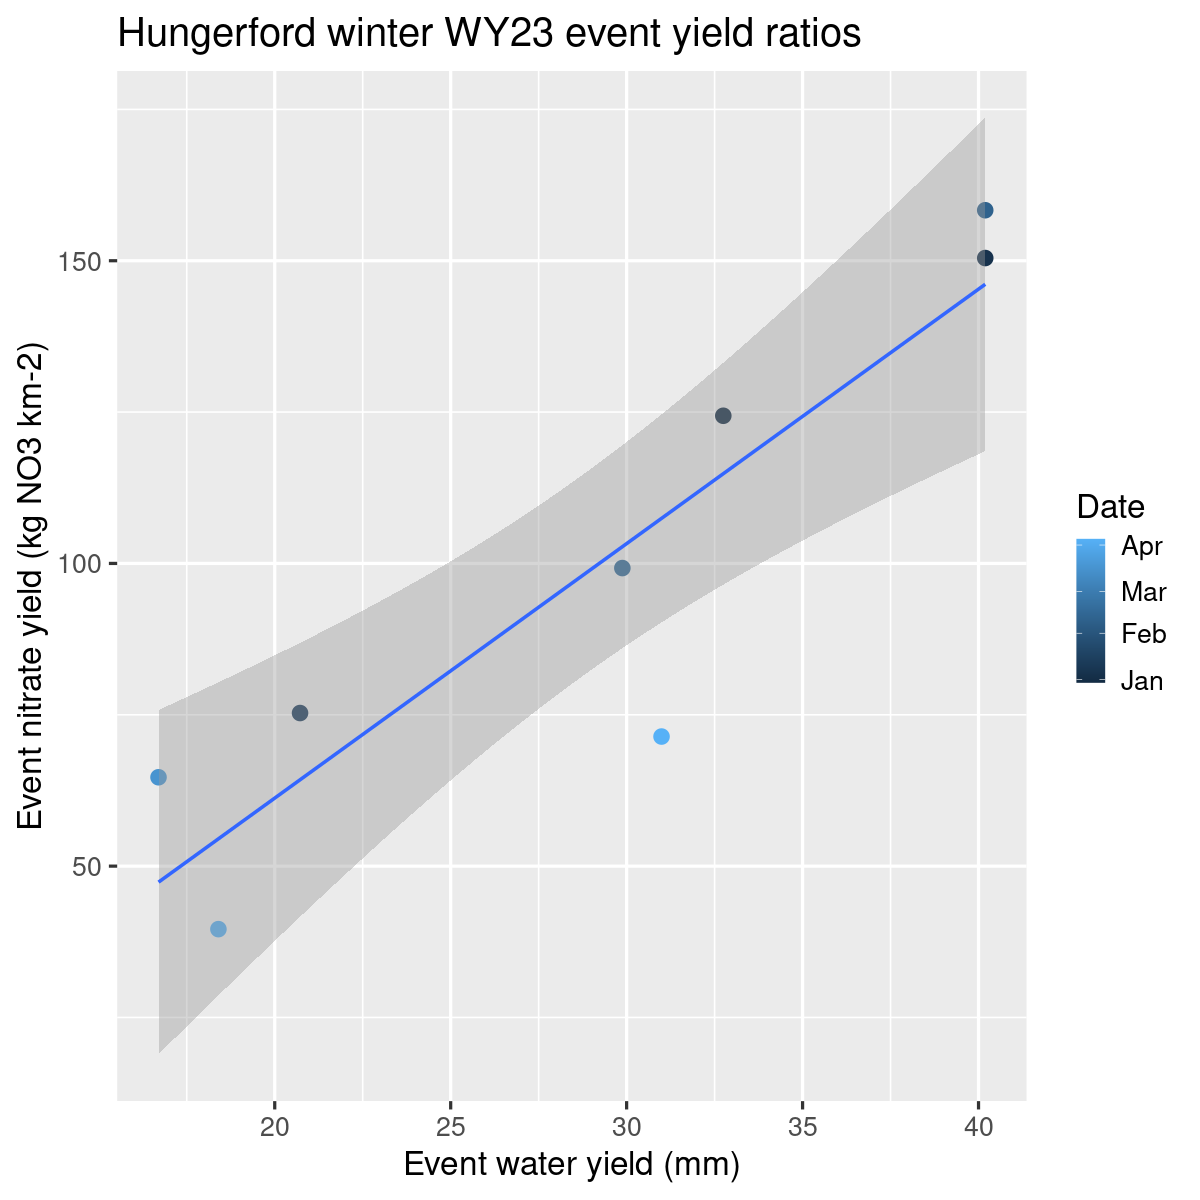

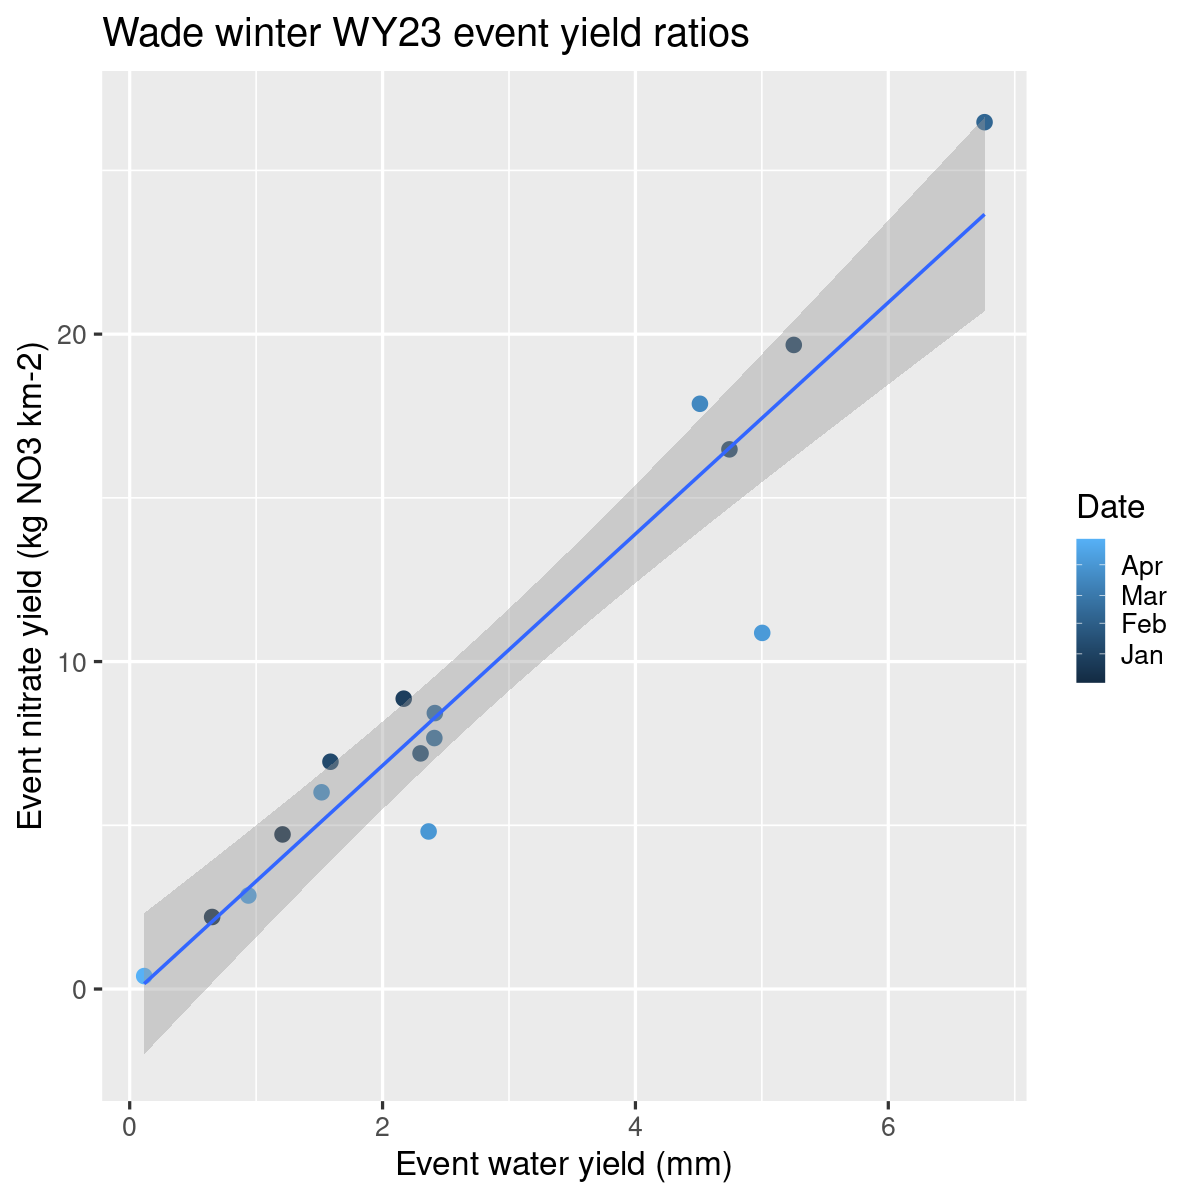

In [167]:
################
# LOAD PACKAGES #
################

library(tidyverse)
library(viridis)
library(lubridate)
library(patchwork)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/EMMA")

input_dir <- "soil-resins/"
output_dir <- "soil-resins/output"
# event delineation script puts original yields here:

# I've put some here for now:
yield_input_dir <- "soil-resins/"

###########################
# READ IN AND FILTER DATA #
###########################

# Read in cumulative 2021-2023 winter NO3 yield data
hungerford_yield_data <- read.csv(file.path(yield_input_dir, "Hungerford_WY22_WY23_storm_NO3_yields.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_data <- read.csv(file.path(yield_input_dir, "Wade_WY22_WY23_storm_NO3_yields.csv")) %>%
  mutate(Date = as.Date(start)) %>% # Convert 'start' to Date format (drop time)
  mutate(water_yield_mm = (water_yield_mm/16.7)) %>% # I think the original code doesn't correct for area
  mutate(constit_yield_mm = (constit_yield_mm/16.7)) # But Hungerford does I think

# Read in Kincaid 2014-2018 non-ice NO3 yield data
hungerford_yield_data_yearly <- read.csv(file.path(yield_input_dir, "Hungerford_2014-2018_non-ice_storm_NO3_yields_millar.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_data_yearly <- read.csv(file.path(yield_input_dir, "Wade_2014-2018_non-ice_storm_NO3_yields_millar.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)
  #mutate(water_yield_mm = (water_yield_mm/16.7)) %>% # I think the original code doesn't correct for area
  #mutate(constit_yield_mm = (constit_yield_mm/16.7)) # But Hungerford does I think

# Define Water Year 2022
wy22_start <- as.Date("2021-10-01")
wy22_end <- as.Date("2022-09-30")

# Define Water Year 2023
wy23_start <- as.Date("2022-10-01")
wy23_end <- as.Date("2023-09-30")

# Filter data for Water Year 2022
hungerford_yield_data_wy22 <- hungerford_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Water Year 2023
hungerford_yield_data_wy23 <- hungerford_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter data for Water Year 2022
wade_yield_data_wy22 <- wade_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Water Year 2023
wade_yield_data_wy23 <- wade_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Read in the compiled monthly available NH4/NO3 data (PO4 until 2023)
resin_data <- read.csv(file.path(input_dir, "Resin_timeseries.csv")) %>%
  mutate(Date = paste(Month, "1", Year, sep = " "),
         Date = mdy(Date))  # Convert the concatenated string to date format

# Filter data for Water Year 2022
resin_data_wy23 <- resin_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_wy23, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg NO3 km-2)") +
    ggtitle("Hungerford winter WY23 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_wy23, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg NO3 km-2)") +
    ggtitle("Wade winter WY23 event yield ratios") +
    theme_grey(base_size = 20)

In [166]:
wade_yield_data

X,storm_id,start,end,tot_q_m3,tot_constit_mgN,duration_hrs,water_yield_mm,constit_yield_mm,intensity_m3_hr,Date
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,storm_1,2021-12-02 16:30:00,2021-12-06 08:00:00,473577.42,4610288290,90.00,1.6779840,16.335217,5261.971,2021-12-02
2,storm_2,2022-04-11 18:00:00,2022-04-18 19:15:00,1672058.46,7813319118,174.00,5.9244533,27.684226,9609.531,2022-04-11
3,storm_3,2022-04-18 19:15:00,2022-04-21 17:15:00,1052920.60,3874357544,72.50,3.7307182,13.727660,14523.043,2022-04-18
4,storm_4,2022-04-21 17:15:00,2022-04-25 18:15:00,778191.25,3212926683,100.25,2.7572946,11.384072,7762.506,2022-04-21
5,storm_5,2022-04-25 18:15:00,2022-05-01 16:30:00,939709.49,3125709517,148.50,3.3295875,11.075043,6328.010,2022-04-25
6,storm_6,2022-05-01 16:30:00,2022-05-14 22:15:00,1301434.58,3886609584,327.50,4.6112553,13.771072,3973.846,2022-05-01
7,storm_7,2022-05-14 22:15:00,2022-05-21 21:30:00,1357295.77,5177946252,170.50,4.8091832,18.346548,7960.679,2022-05-14
8,storm_8,2022-05-21 21:30:00,2022-05-27 05:15:00,573269.92,2179704752,134.00,2.0312154,7.723150,4278.134,2022-05-21
9,storm_9,2022-12-03 14:30:00,2022-12-06 16:30:00,337107.10,1316707556,76.50,1.1944410,4.665371,4406.629,2022-12-03


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


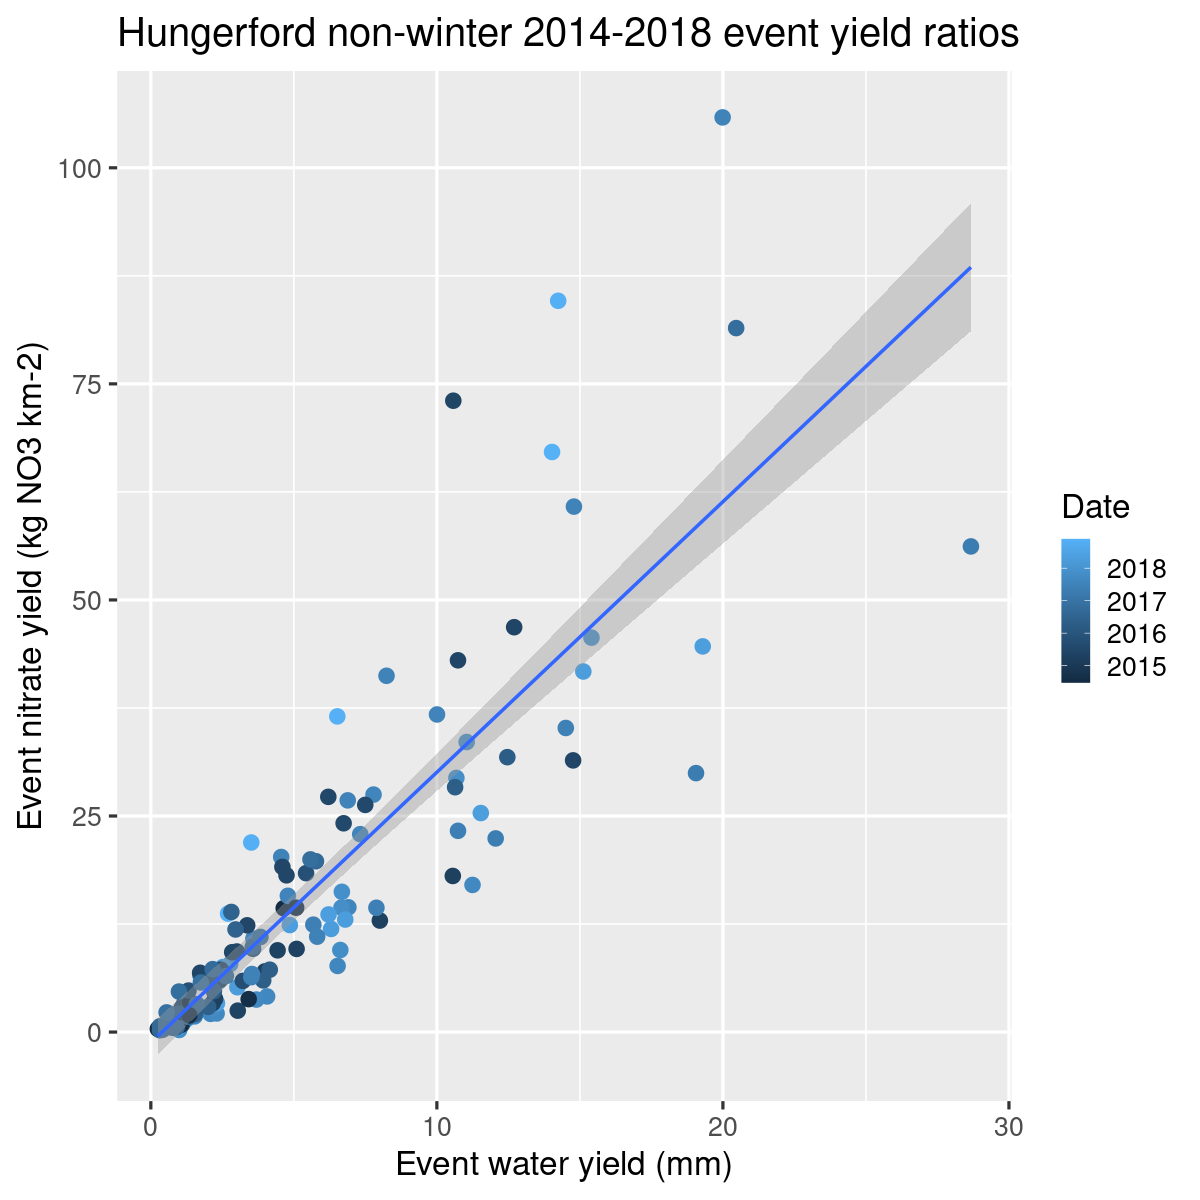

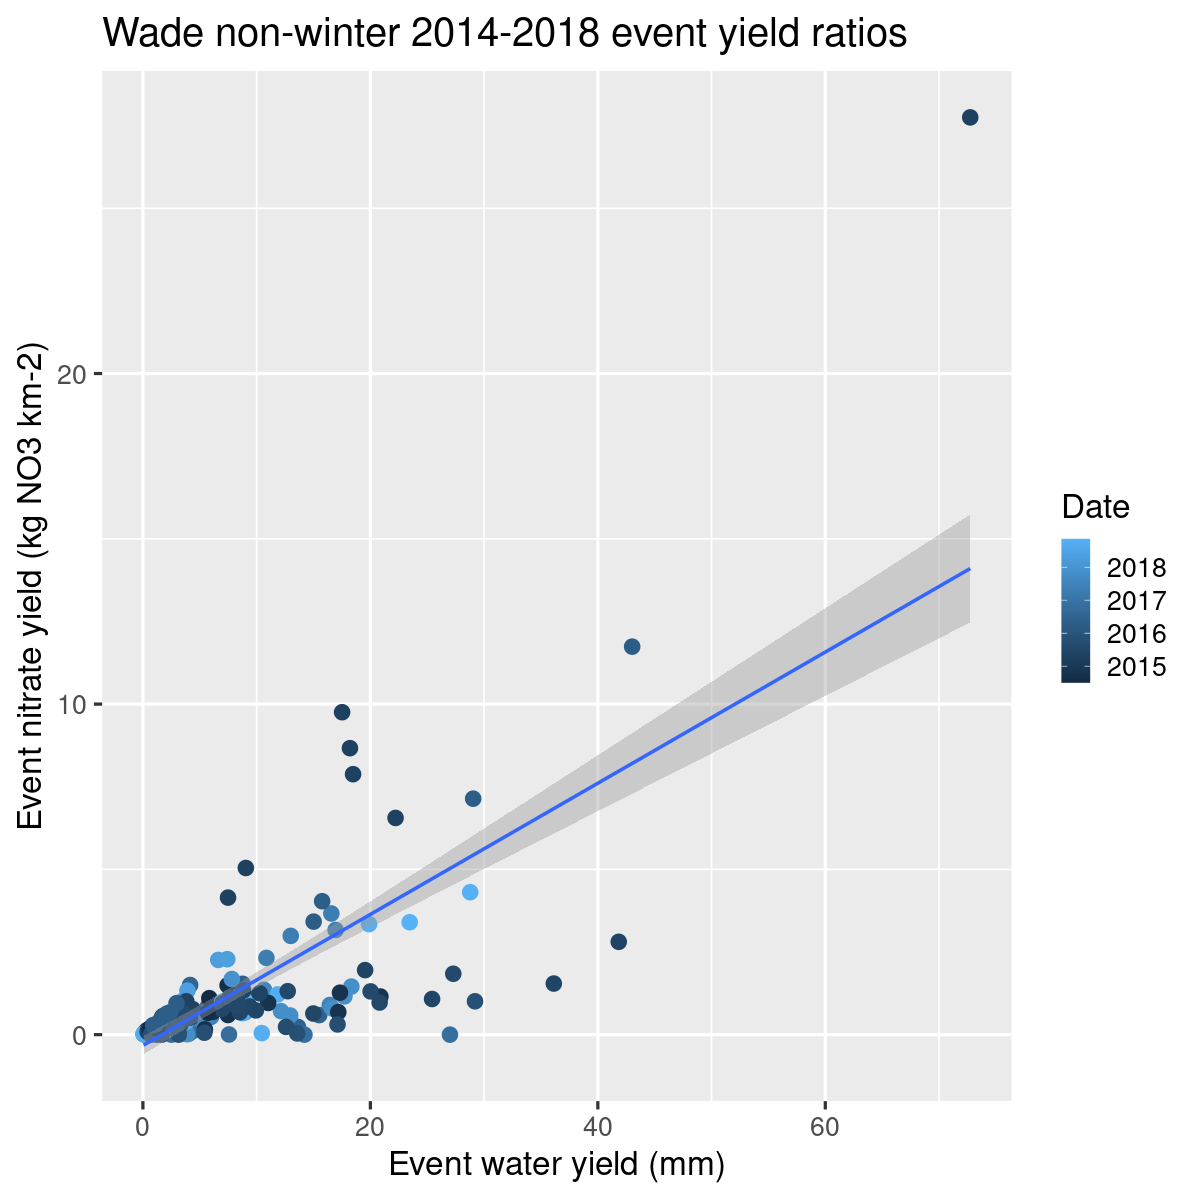

In [88]:
######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_yearly, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg NO3 km-2)") +
    ggtitle("Hungerford non-winter 2014-2018 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_yearly, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg NO3 km-2)") +
    ggtitle("Wade non-winter 2014-2018 event yield ratios") +
    theme_grey(base_size = 20)

`geom_smooth()` using formula = 'y ~ x'


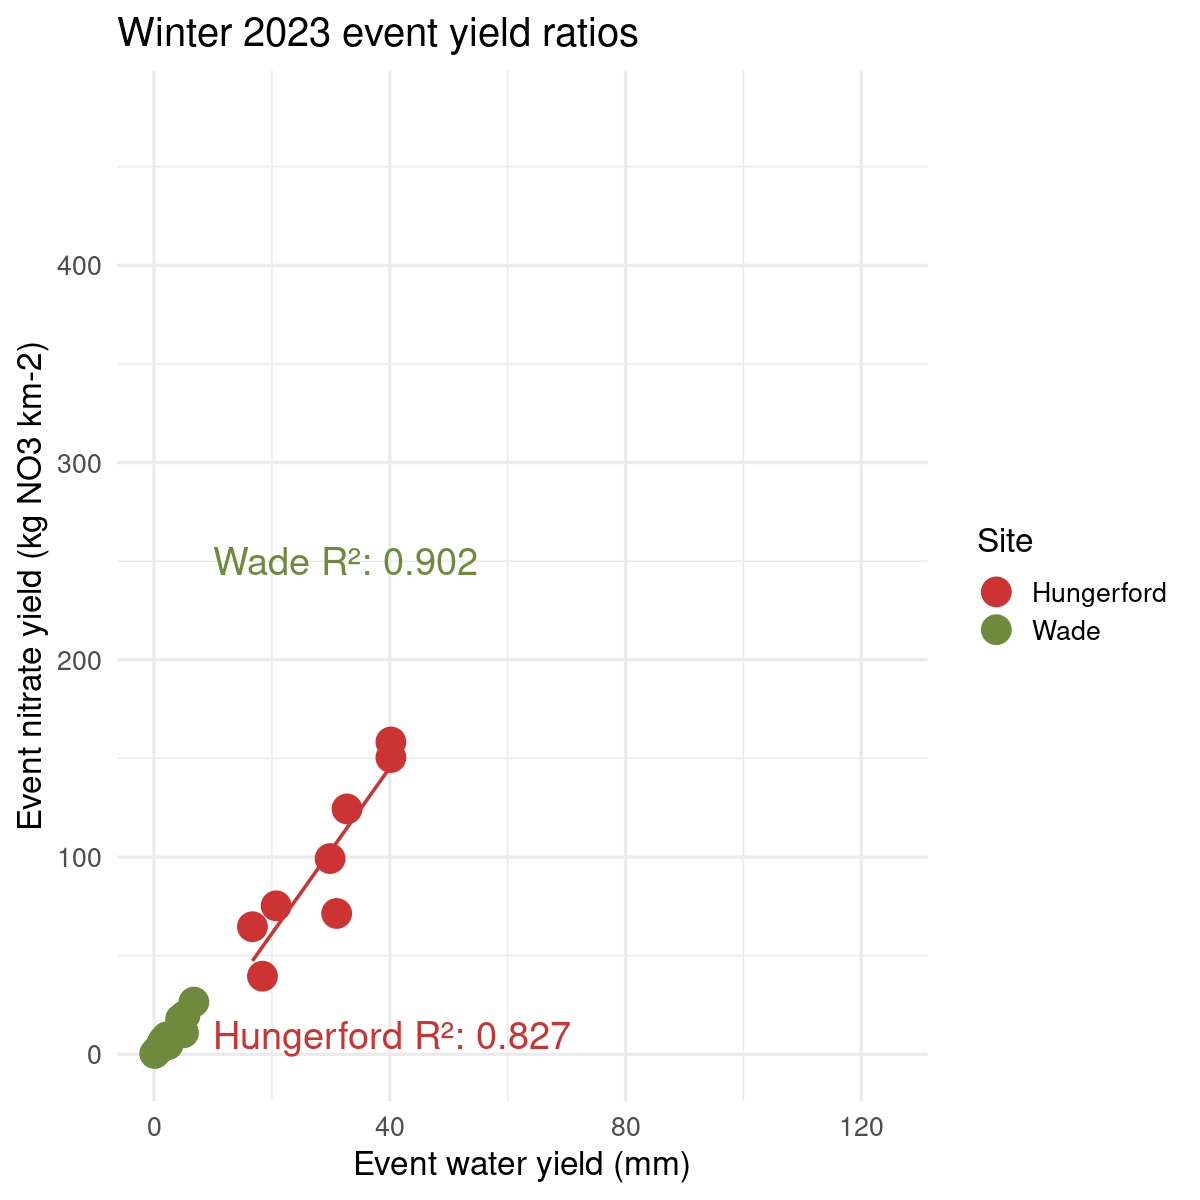

In [179]:
# Load required packages
library(tidyverse)

# Combine winter Hungerford and Wade data into a single data frame with a site identifier
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford and Wade data into a single data frame with a site identifier, too
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23)

# Fit linear models to calculate R² values
hungerford_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Site == "Hungerford"))
hungerford_r2 <- summary(hungerford_lm)$r.squared

wade_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Site == "Wade"))
wade_r2 <- summary(wade_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Site)) +
  geom_point(size = 8) +
  geom_smooth(method = lm, se = FALSE, aes(linetype = Site)) +
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Winter 2023 event yield ratios") +
  xlim(0, 125) +
  ylim(0, 475) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 10, label = paste0("Hungerford R²: ", round(hungerford_r2, 3)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 10, y = 250, label = paste0("Wade R²: ", round(wade_r2, 3)), 
           color = "darkolivegreen4", hjust = 0, size = 8)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing missing values (`geom_smooth()`).”


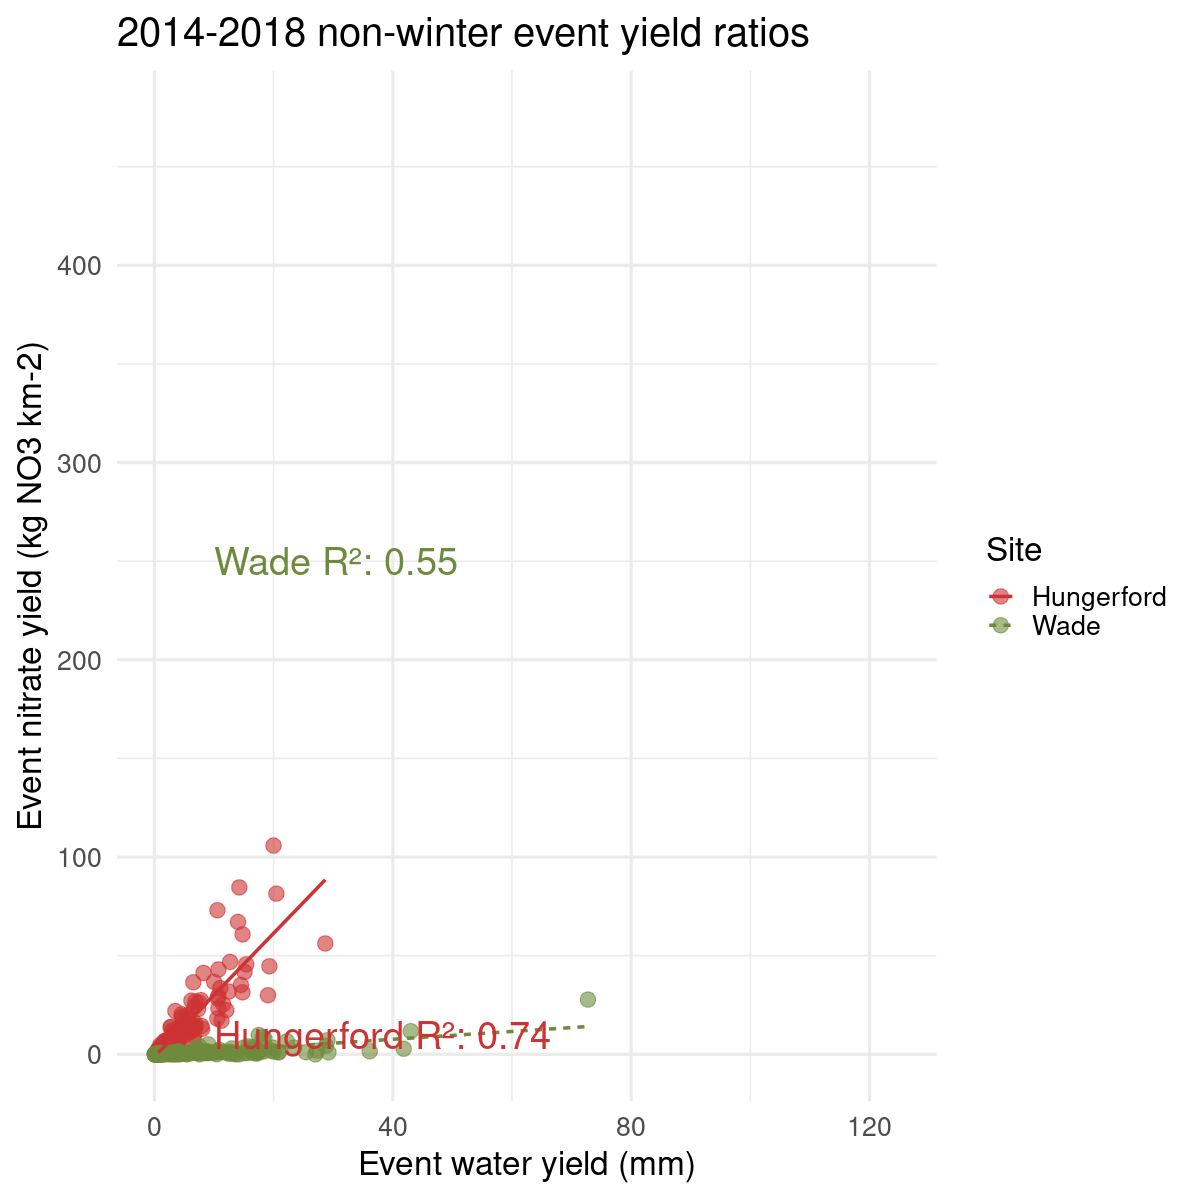

In [125]:
# Load required packages
library(tidyverse)

# Combine winter Hungerford and Wade data into a single data frame with a site identifier
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford and Wade data into a single data frame with a site identifier, too
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(hungerford_yield_data_yearly, wade_yield_data_yearly)

# Fit linear models to calculate R² values
hungerford_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Site == "Hungerford"))
hungerford_r2 <- summary(hungerford_lm)$r.squared

wade_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Site == "Wade"))
wade_r2 <- summary(wade_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Site)) +
  geom_point(size = 4, alpha = 0.6) +
  geom_smooth(method = lm, se = FALSE, aes(linetype = Site)) +
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "2014-2018 non-winter event yield ratios") +
  xlim(0, 125) +
  ylim(0, 475) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 10, label = paste0("Hungerford R²: ", round(hungerford_r2, 2)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 10, y = 250, label = paste0("Wade R²: ", round(wade_r2, 2)), 
           color = "darkolivegreen4", hjust = 0, size = 8)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing missing values (`geom_smooth()`).”


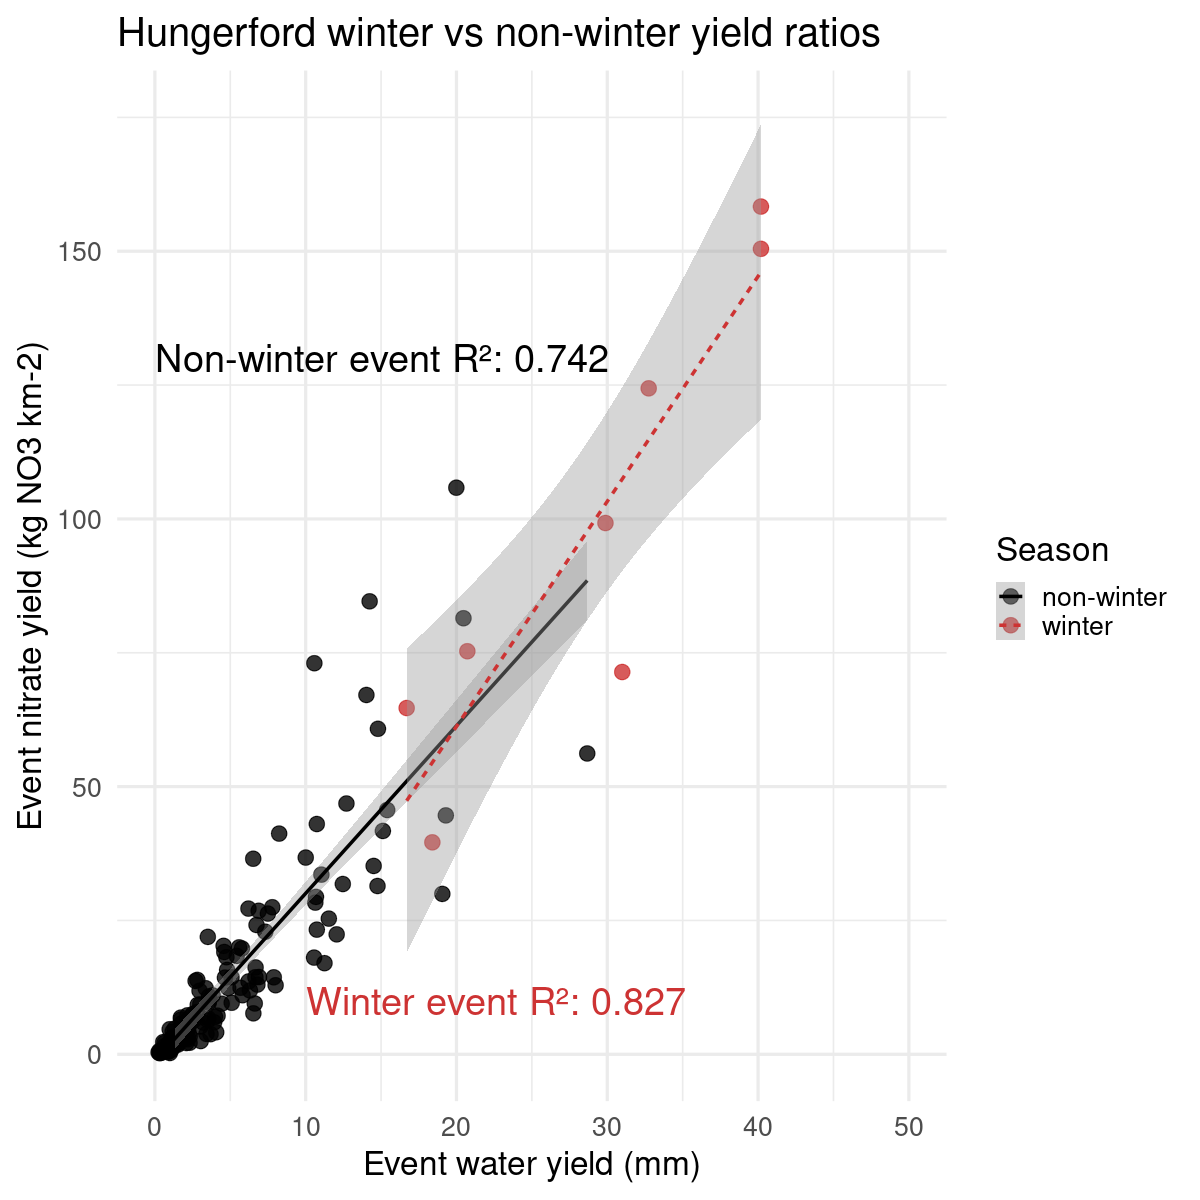

In [188]:
# Load required packages
library(tidyverse)

# Combine winter and non-winter Hungerford 
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

#wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  #mutate(Site = "Wade") %>%
  #mutate(Season = "winter")

# Add non-winter Hungerford
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

#wade_yield_data_yearly <- wade_yield_data_yearly %>%
  #mutate(Site = "Wade") %>%
  #mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(hungerford_yield_data_wy23, hungerford_yield_data_yearly)

# Fit linear models to calculate R² values
hungerford_winter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Season == "winter"))
hungerford_winter_r2 <- summary(hungerford_winter_lm)$r.squared

hungerford_nonwinter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Season == "non-winter"))
hungerford_nonwinter_r2 <- summary(hungerford_nonwinter_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Season)) +
  geom_point(size = 4, alpha = 0.8) +
  geom_smooth(method = lm, aes(linetype = Season)) +
  scale_color_manual(values = c("winter" = "#CD3333", "non-winter" = "black")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Hungerford winter vs non-winter yield ratios") +
  xlim(0, 50) +
  ylim(0, 175) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 10, label = paste0("Winter event R²: ", round(hungerford_winter_r2, 3)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 0, y = 130, label = paste0("Non-winter event R²: ", round(hungerford_nonwinter_r2, 3)), 
           color = "black", hjust = 0, size = 8)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


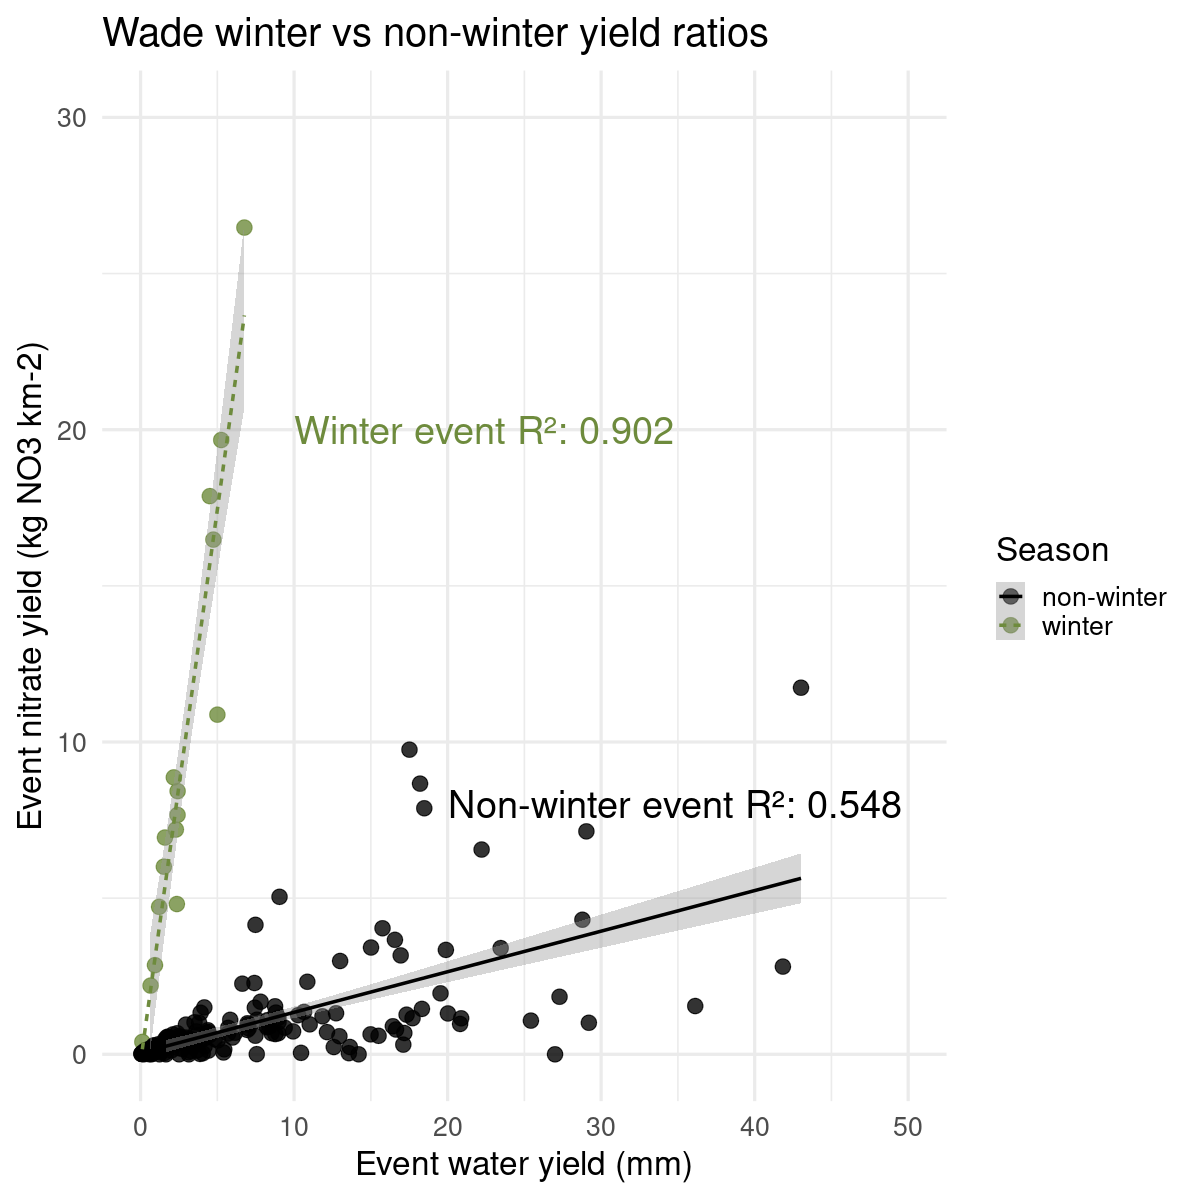

In [187]:
# Load required packages
library(tidyverse)

# Combine winter and non-winter Hungerford 
#hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  #mutate(Site = "Hungerford") %>%
  #mutate(Season = "winter")

wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford
#hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  #mutate(Site = "Hungerford") %>%
  #mutate(Season = "non-winter")

wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(wade_yield_data_wy23, wade_yield_data_yearly)

# Fit linear models to calculate R² values
wade_winter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Season == "winter"))
wade_winter_r2 <- summary(wade_winter_lm)$r.squared

wade_nonwinter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Season == "non-winter"))
wade_nonwinter_r2 <- summary(wade_nonwinter_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Season)) +
  geom_point(size = 4, alpha = 0.8) +
  geom_smooth(method = lm, aes(linetype = Season)) +
  scale_color_manual(values = c("winter" = "darkolivegreen4", "non-winter" = "black")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Wade winter vs non-winter yield ratios") +
  xlim(0, 50) +
  ylim(0, 30) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 20, label = paste0("Winter event R²: ", round(wade_winter_r2, 3)), 
           color = "darkolivegreen4", hjust = 0, size = 8) +
  annotate("text", x = 20, y = 8, label = paste0("Non-winter event R²: ", round(wade_nonwinter_r2, 3)), 
           color = "black", hjust = 0, size = 8)

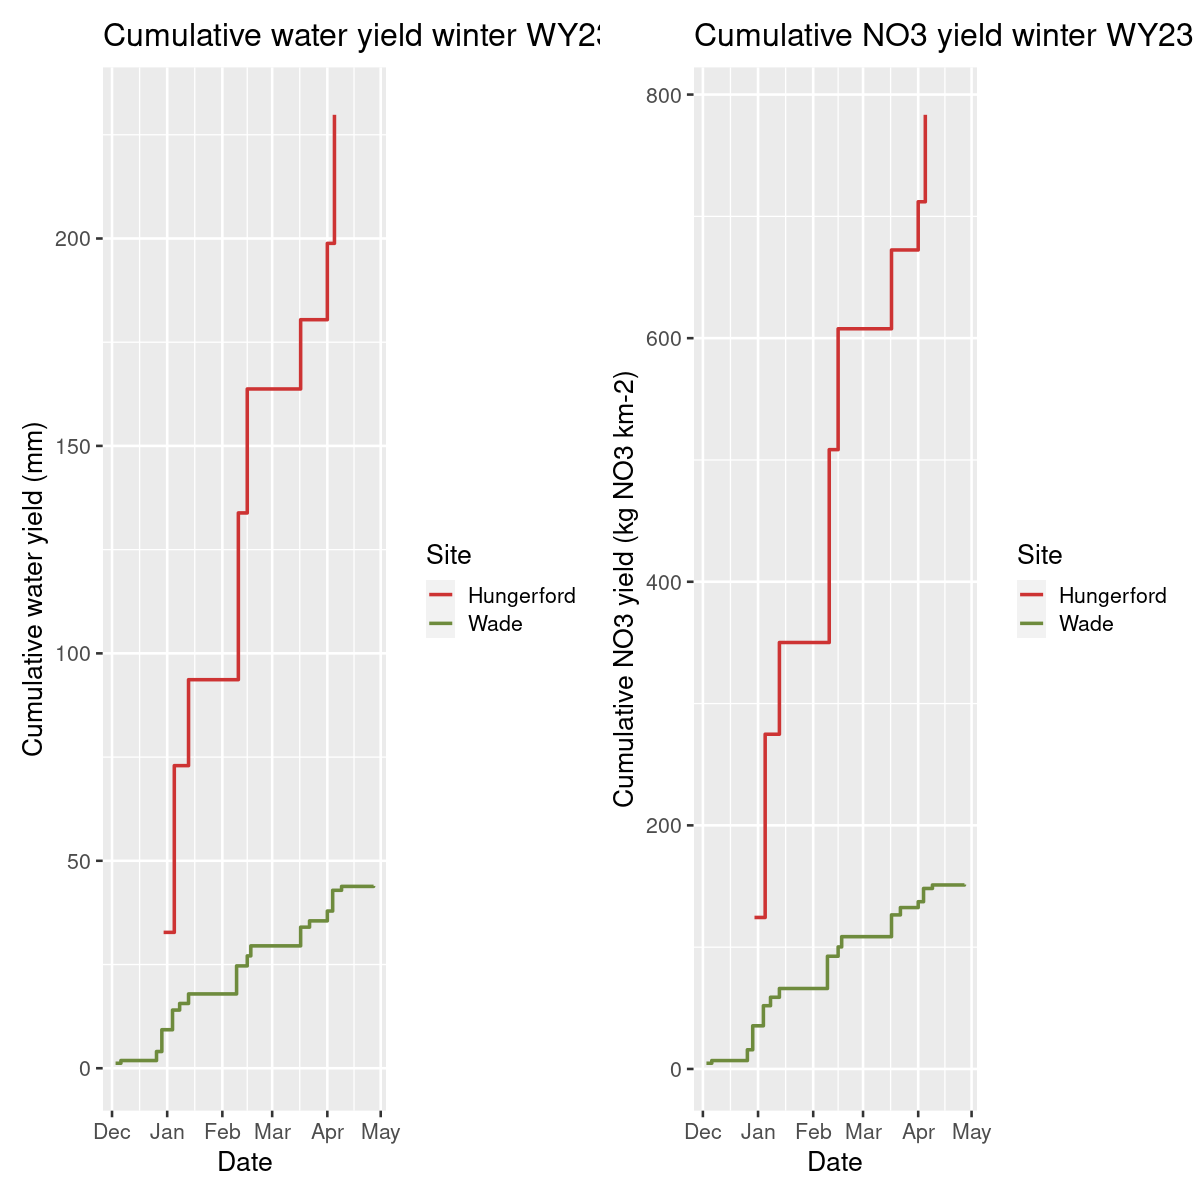

In [180]:
# Add cumulative sums grouped by site
combined_data <- combined_data %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  ungroup()

options(repr.plot.width = 10, repr.plot.height = 10) 

# Plot for cumulative water yield
p1 <- ggplot(combined_data, aes(x = Date, y = cumulative_water_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Date",
       y = "Cumulative water yield (mm)",
       title = "Cumulative water yield winter WY23") +
  theme_grey(base_size = 16)

# Plot for cumulative nitrate yield
p2 <- ggplot(combined_data, aes(x = Date, y = cumulative_constit_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Date",
       y = "Cumulative NO3 yield (kg NO3 km-2)",
       title = "Cumulative NO3 yield winter WY23") +
  theme_grey(base_size = 16)

# Combine the two plots side-by-side
library(patchwork)
p1 + p2

ggsave(plot = p1, width = 8, height = 4, dpi = 300, filename = "winter_WY23_wateryield.png")
ggsave(plot = p2, width = 8, height = 4, dpi = 300, filename = "winter_WY23_nitrateyield.png")

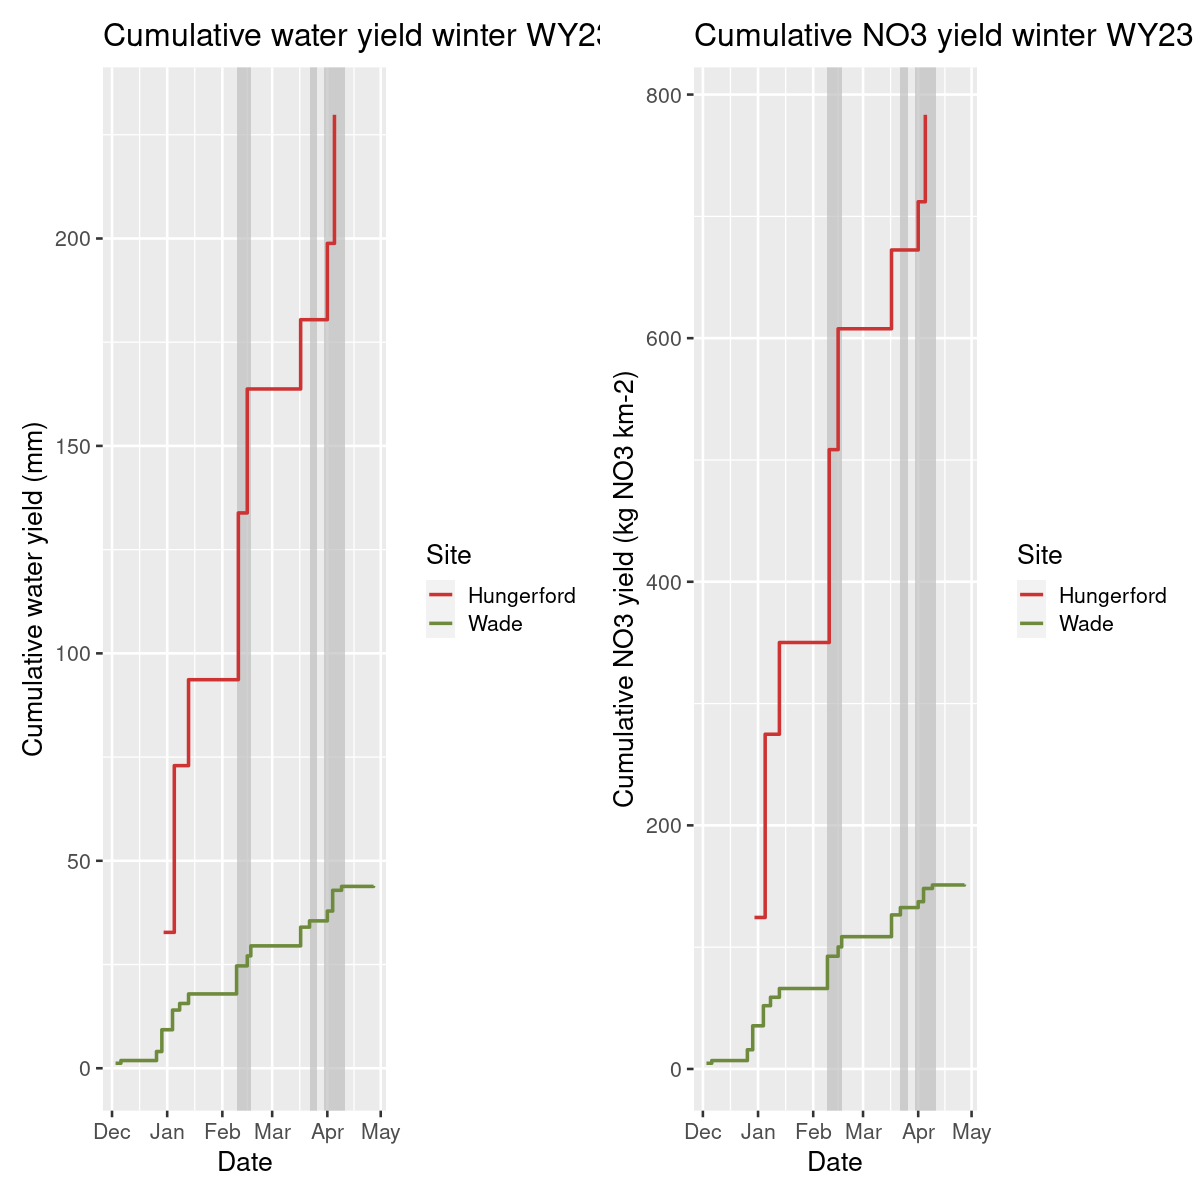

In [181]:
# Define the sampling date ranges
sampling_ranges <- data.frame(
  xmin = as.Date(c("2023-02-09", "2023-03-22", "2023-03-30")),
  xmax = as.Date(c("2023-02-17", "2023-03-26", "2023-04-11"))
)

# Add cumulative sums grouped by site
combined_data <- combined_data %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  ungroup()

options(repr.plot.width = 10, repr.plot.height = 10) 

# Plot for cumulative water yield
p1 <- ggplot(combined_data, aes(x = Date, y = cumulative_water_yield, color = Site)) +
  # Add shaded bands
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "grey", alpha = 0.7, inherit.aes = FALSE) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Date",
       y = "Cumulative water yield (mm)",
       title = "Cumulative water yield winter WY23") +
  theme_grey(base_size = 16)

# Plot for cumulative nitrate yield
p2 <- ggplot(combined_data, aes(x = Date, y = cumulative_constit_yield, color = Site)) +
  # Add shaded bands
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "grey", alpha = 0.7, inherit.aes = FALSE) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Date",
       y = "Cumulative NO3 yield (kg NO3 km-2)",
       title = "Cumulative NO3 yield winter WY23") +
  theme_grey(base_size = 16)

# Combine the two plots side-by-side
library(patchwork)
p1 + p2

# Save the plots
ggsave(plot = p1, width = 8, height = 4, dpi = 300, filename = "winter_WY23_wateryield.png")
ggsave(plot = p2, width = 8, height = 4, dpi = 300, filename = "winter_WY23_nitrateyield.png")

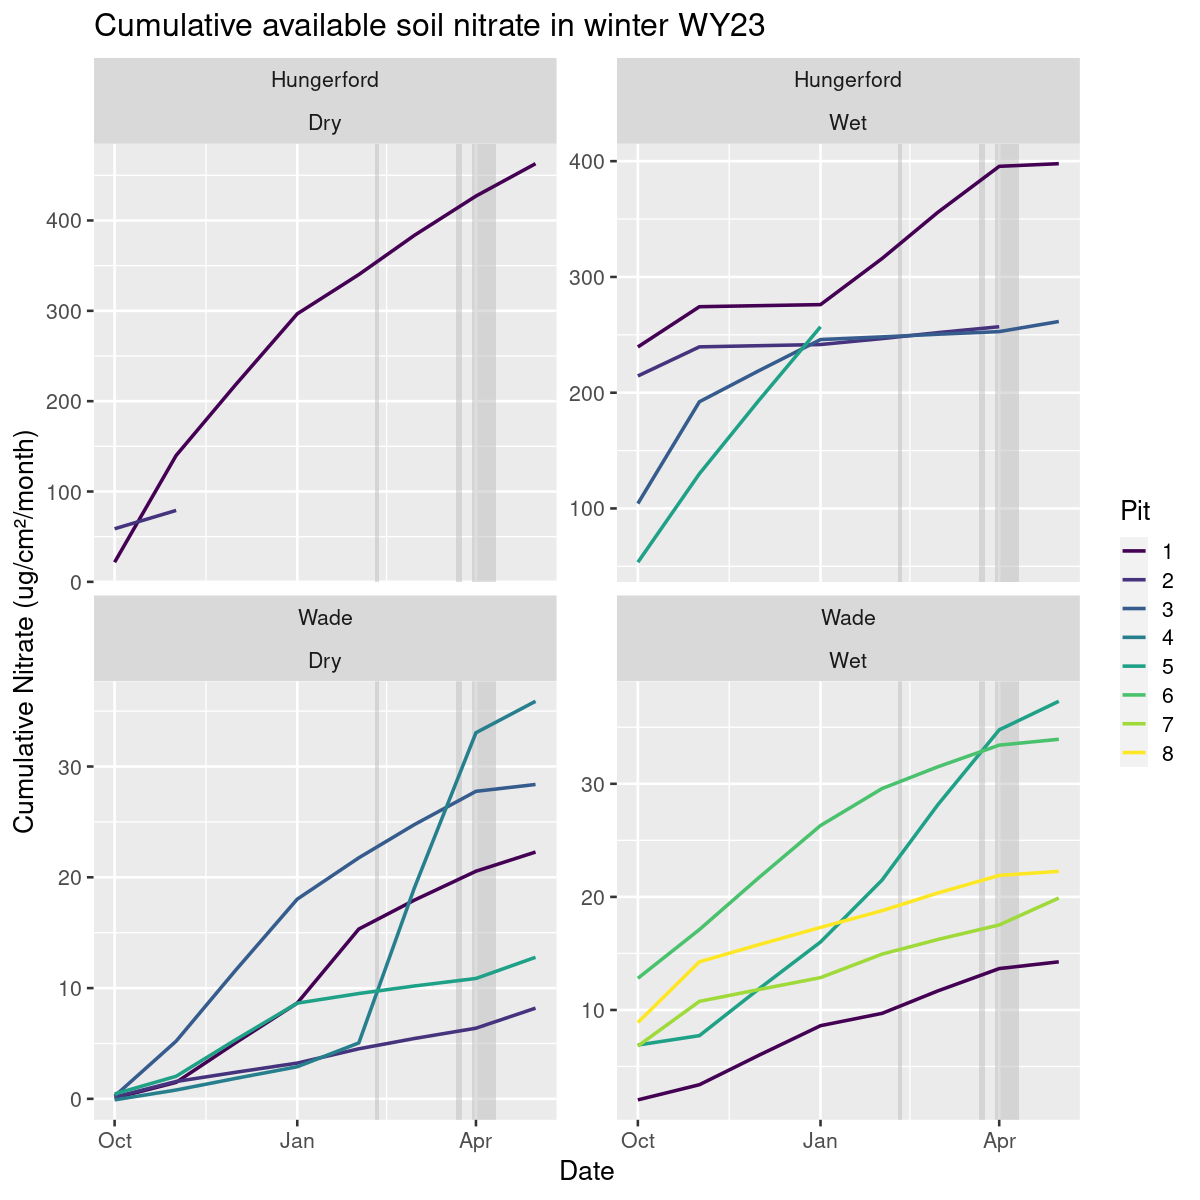

In [81]:
# Filter data for Nitrate species
nitrate_data <- resin_data_wy23 %>%
  filter(Species == "Nitrate") %>%
  arrange(Site, Transect, Pit, Date) %>%
  group_by(Site, Transect, Pit) %>%
  mutate(cumulative_ug_cm2 = cumsum(ug_cm2_month)) %>%
  ungroup()

# Define the sampling date ranges for shading
sampling_ranges <- data.frame(
  xmin = as.Date(c("2023-02-09", "2023-03-22", "2023-03-30")),
  xmax = as.Date(c("2023-02-11", "2023-03-25", "2023-04-11"))
)

# Plot cumulative nitrate with faceting and line color by Pit
p <- ggplot(nitrate_data, aes(x = Date, y = cumulative_ug_cm2, color = factor(Pit))) +
  # Add shaded bands
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf),
            fill = "grey", alpha = 0.5, inherit.aes = FALSE) +
  geom_line(size = 1) +  # Line plot for cumulative nitrate
  facet_wrap(~ Site + Transect, scales = "free_y") +  # Facet by Site and Transect
  scale_color_viridis_d(name = "Pit") +  # Use a color palette for Pit
  labs(x = "Date",
       y = "Cumulative Nitrate (ug/cm²/month)",
       title = "Cumulative available soil nitrate in winter WY23") +
  theme_grey(base_size = 16)

# Display the plot
print(p)

# Optionally save the plot
ggsave(plot = p, width = 12, height = 8, dpi = 300, filename = "cumulative_nitrate_faceted.png")


FOr WY22

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


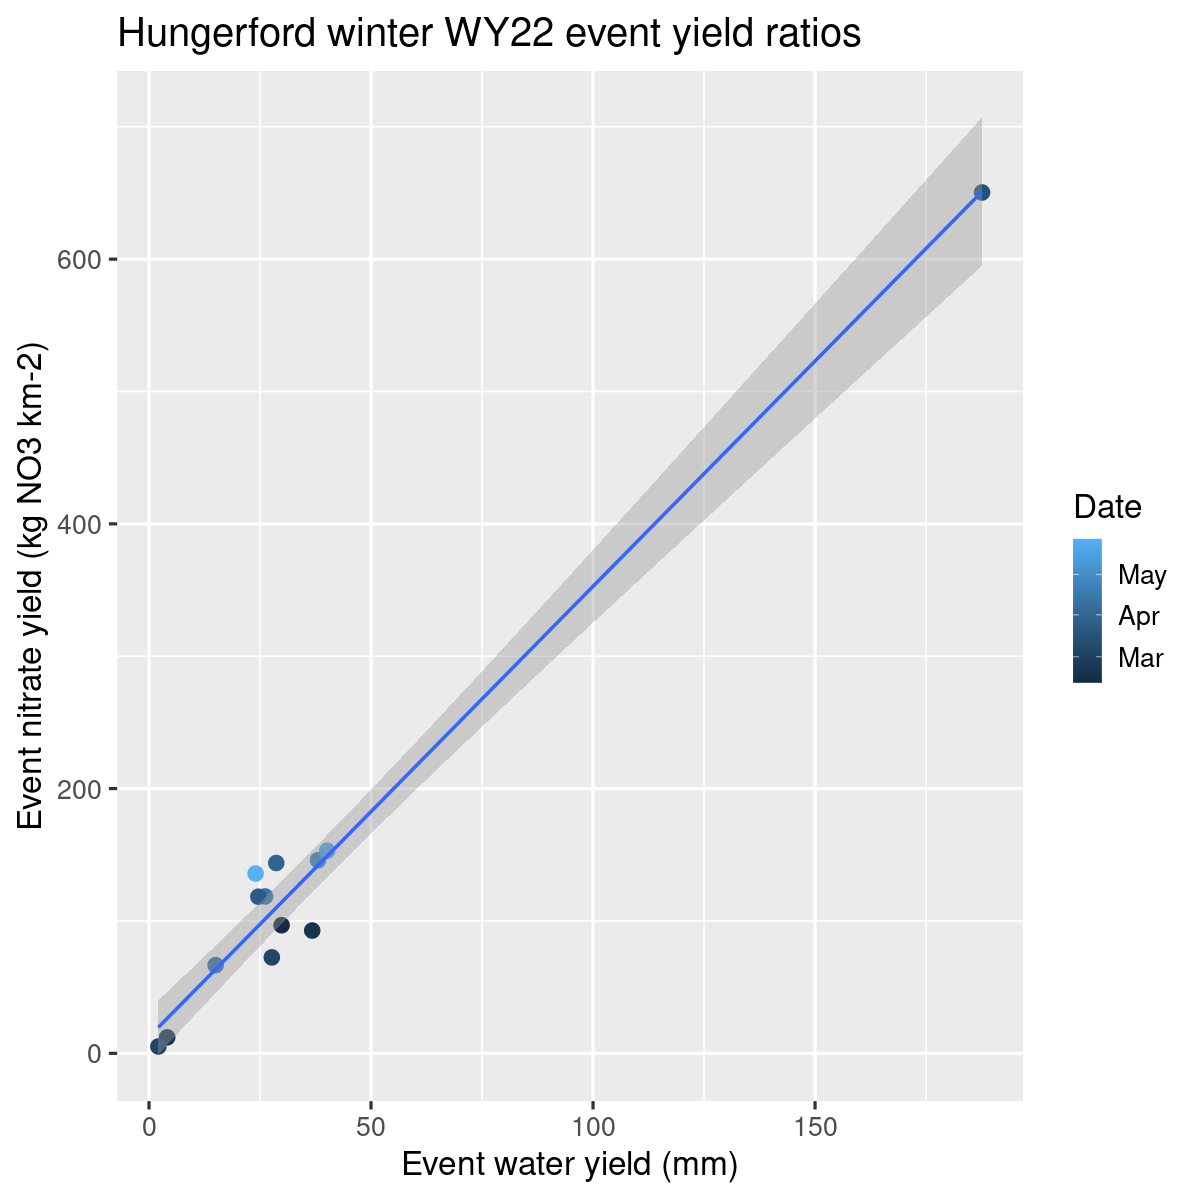

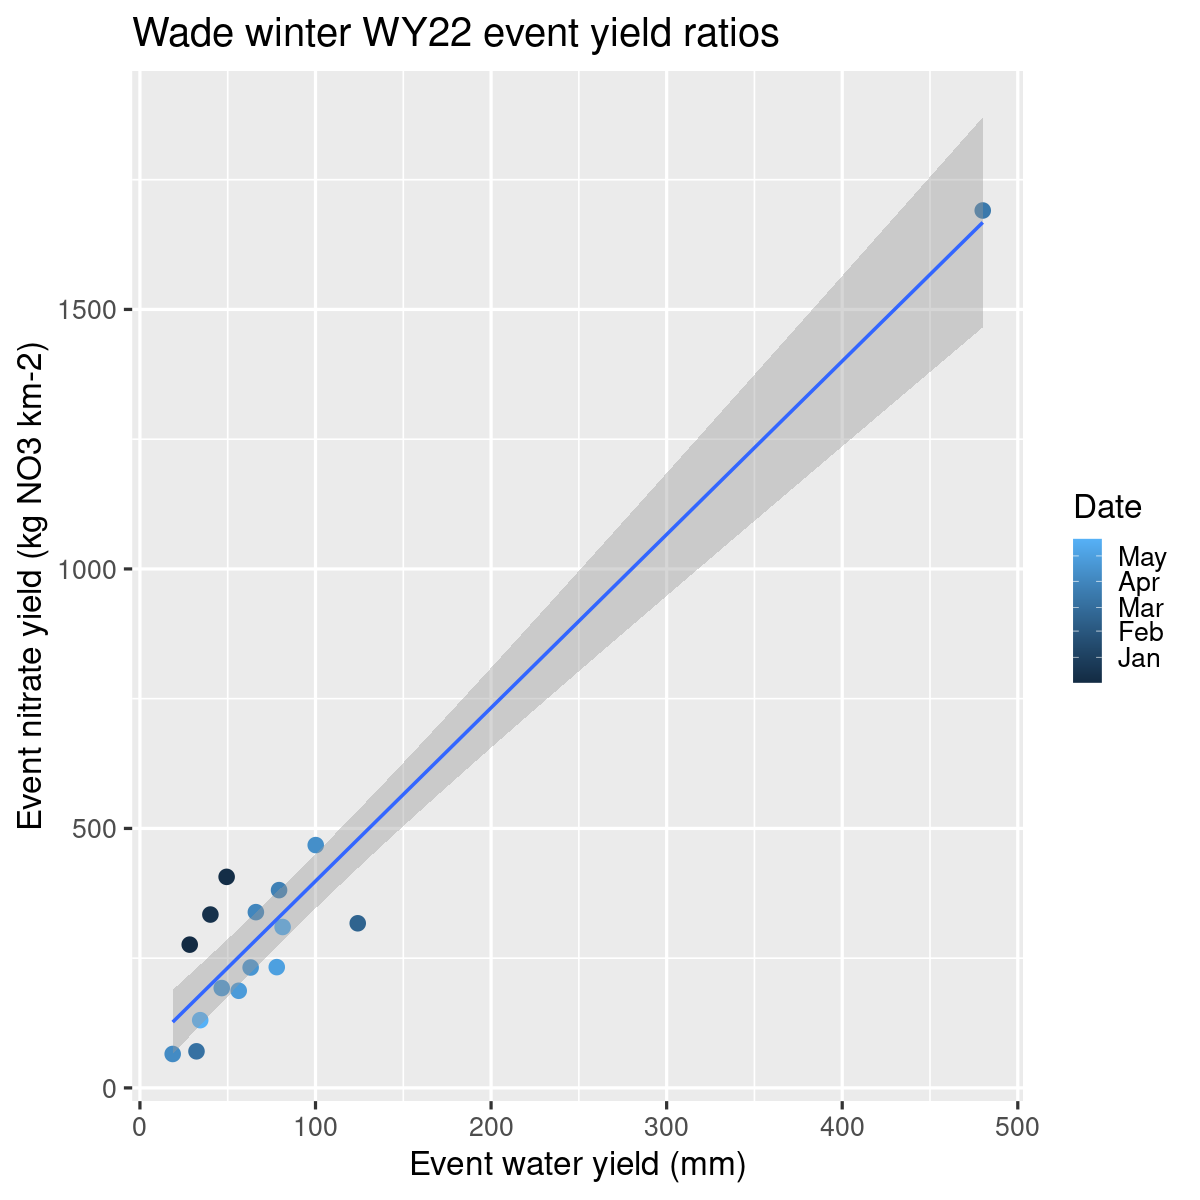

In [60]:
################
# LOAD PACKAGES #
################

library(tidyverse)
library(viridis)
library(lubridate)
library(patchwork)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/EMMA")

input_dir <- "soil-resins/"
output_dir <- "soil-resins/output"
# event delineation script puts original yields here:

# I've put some here for now:
yield_input_dir <- "soil-resins/"

###########################
# READ IN AND FILTER DATA #
###########################

# Read in cumulative NO3 data
hungerford_yield_data <- read.csv(file.path(yield_input_dir, "Hungerford_WY22_WY23_storm_NO3_yields.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_data <- read.csv(file.path(yield_input_dir, "Wade_WY22_WY23_storm_NO3_yields.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

# Define Water Year 2022
wy22_start <- as.Date("2021-10-01")
wy22_end <- as.Date("2022-09-30")

# Define Water Year 2023
wy23_start <- as.Date("2022-10-01")
wy23_end <- as.Date("2023-09-30")

# Filter data for Water Year 2022
hungerford_yield_data_wy22 <- hungerford_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Water Year 2022
hungerford_yield_data_wy23 <- hungerford_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter data for Water Year 2022
wade_yield_data_wy22 <- wade_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Water Year 2022
wade_yield_data_wy23 <- wade_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

ggplot(hungerford_yield_data_wy22, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg NO3 km-2)") +
    ggtitle("Hungerford winter WY22 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_wy22, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg NO3 km-2)") +
    ggtitle("Wade winter WY22 event yield ratios") +
    theme_grey(base_size = 20)

`geom_smooth()` using formula = 'y ~ x'


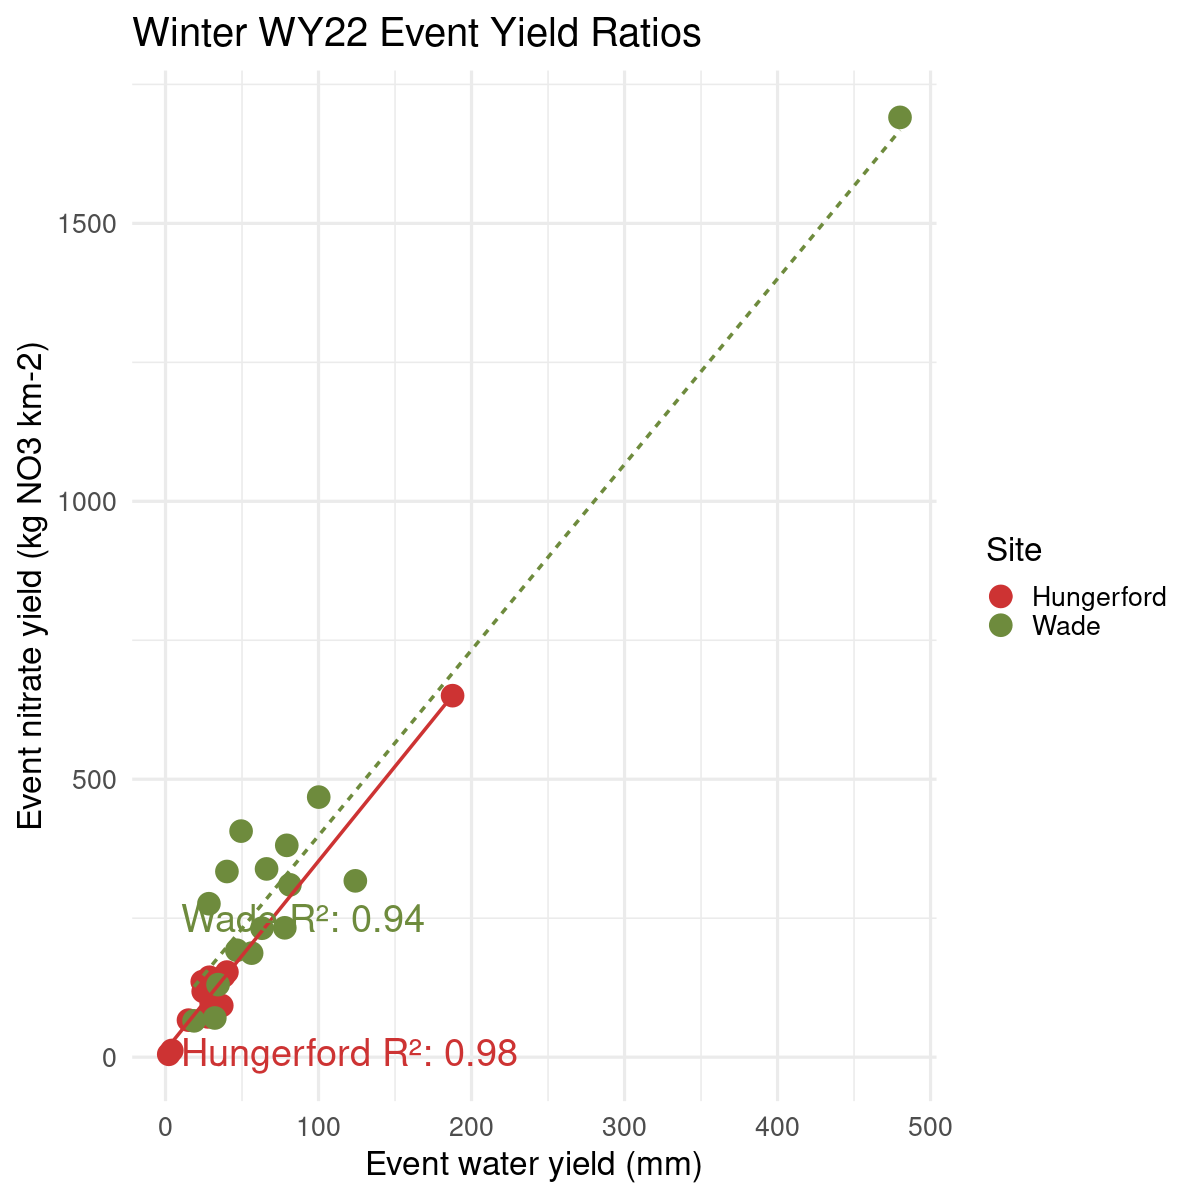

In [62]:
# Load required packages
library(tidyverse)

# Combine Hungerford and Wade data into a single data frame with a site identifier
hungerford_yield_data_wy22 <- hungerford_yield_data_wy22 %>%
  mutate(Site = "Hungerford")

wade_yield_data_wy22 <- wade_yield_data_wy22 %>%
  mutate(Site = "Wade")

combined_data <- bind_rows(hungerford_yield_data_wy22, wade_yield_data_wy22)

# Fit linear models to calculate R² values
hungerford_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Site == "Hungerford"))
hungerford_r2 <- summary(hungerford_lm)$r.squared

wade_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Site == "Wade"))
wade_r2 <- summary(wade_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Site)) +
  geom_point(size = 6) +
  geom_smooth(method = lm, se = FALSE, aes(linetype = Site)) +
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Winter WY22 Event Yield Ratios") +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 10, label = paste0("Hungerford R²: ", round(hungerford_r2, 2)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 10, y = 250, label = paste0("Wade R²: ", round(wade_r2, 2)), 
           color = "darkolivegreen4", hjust = 0, size = 8)